импорт всех нужных библиотек

In [1]:
from sklearn.model_selection import train_test_split
import torch
import sys
import os
from model import QuantumTrainer,QuantumNeuralNetwork
import numpy as np

import matplotlib.pyplot as plt
#путь к корню директории
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.abspath(BASE_DIR))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer
from model_history import ModelHistory

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Загрузка и подготовка данных для анализа и обучения модели.<br>
разбиение на train,test


In [2]:
path = BASE_DIR + '\data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
pd_params = (10,9,50,1)
window_size,num_features,downsample_step,target_window_size = pd_params 

# Подготовка данных
X, y, df = PD.vec_to_vec(
    window_size,
    num_features,
    downsample_step,
    target_window_size,
    device=device  
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = PD.PDtrain_test_split(
    X, y, test_size=0.33, random_state=42
)

In [3]:
#инициализация модели
hidden_size = 256
num_bands = 8
model = QuantumNeuralNetwork( 
    input_size = X_train.shape[1], # window_size*num_features - 1
    output_size = target_window_size,
    hidden_size = hidden_size,
    num_bands = num_bands,
    device = device)

lr = 0.001
trainer = QuantumTrainer(
    model=model,
    learning_rate=lr,
    inf_per_epoch = 10,
    device= device
)

In [4]:
batch_size = 32
history = trainer.fit(
    X=X_train,
    y=y_train,
    X_t=X_test,
    y_t=y_test,
    batch_size=batch_size,
    epochs=200,
    loss_tube=5
)

Epoch 10
Train - Total: 0.399579, Main: 0.361597, Quantum: 0.644737, MAPE: 0.170071, Alpha: 0.589105
Test - MAPE: 0.137368, Tube: 0.240338
Epoch 20
Train - Total: 0.311780, Main: 0.275300, Quantum: 0.642105, MAPE: 0.131120, Alpha: 0.568134
Test - MAPE: 0.196695, Tube: 0.229745
Epoch 30
Train - Total: 0.296621, Main: 0.260197, Quantum: 0.645369, MAPE: 0.127392, Alpha: 0.564391
Test - MAPE: 0.117862, Tube: 0.347266
Epoch 40
Train - Total: 0.260412, Main: 0.224462, Quantum: 0.646923, MAPE: 0.109437, Alpha: 0.555713
Test - MAPE: 0.102288, Tube: 0.388778
Epoch 50
Train - Total: 0.255221, Main: 0.219248, Quantum: 0.648956, MAPE: 0.108159, Alpha: 0.554326
Test - MAPE: 0.065895, Tube: 0.495992
Epoch 60
Train - Total: 0.200501, Main: 0.165400, Quantum: 0.648561, MAPE: 0.080196, Alpha: 0.541213
Test - MAPE: 0.142286, Tube: 0.186516
Epoch 70
Train - Total: 0.213360, Main: 0.178059, Quantum: 0.648561, MAPE: 0.087079, Alpha: 0.544296
Test - MAPE: 0.063254, Tube: 0.464930
Epoch 80
Train - Total: 0.1

In [6]:
model.training = False
#model.load_state_dict(torch.load('best_model_weights.pth'))

In [7]:
MH = ModelHistory(history)
MH.save_history_json(filename = BASE_DIR+'\loss_history/all_loss.json',model_name = 'QUANT')

In [8]:
key = MH.add_result(
        filename = BASE_DIR+'\\resualt/main.json',
        model_name = 'QUANT',
        result = 'best',
        message = 'тестовое обучение',
        params = {'hidden_size': hidden_size, 'num_bands': num_bands,'lr':lr,'batch_size':batch_size}
        )
key

'9a6510f3-1efa-477a-9419-75aea782f46a'

In [9]:
LV = LossVisualizer(history)

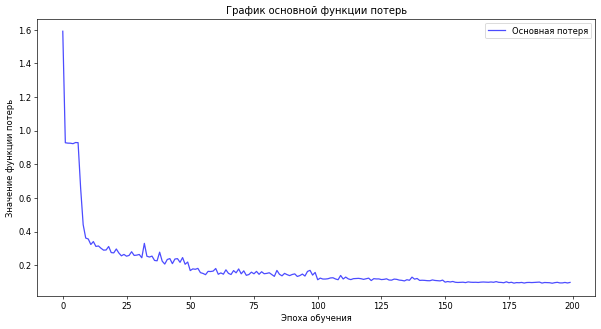

In [10]:
LV.show_training_loss()

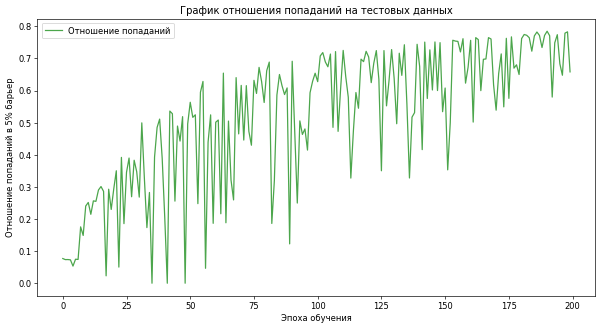

In [11]:
LV.show_test_tube()

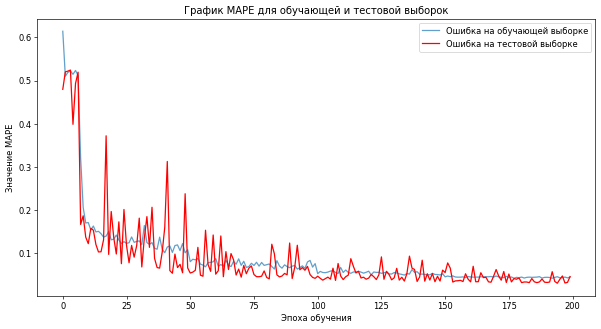

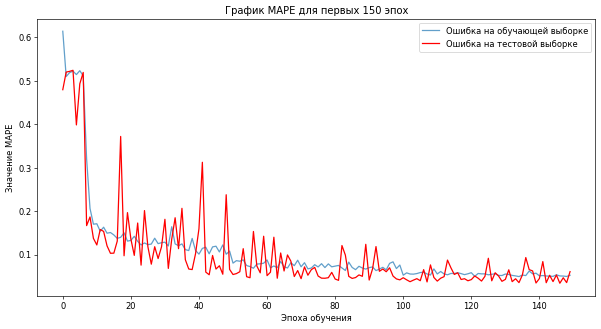

In [12]:
LV.show_mape()

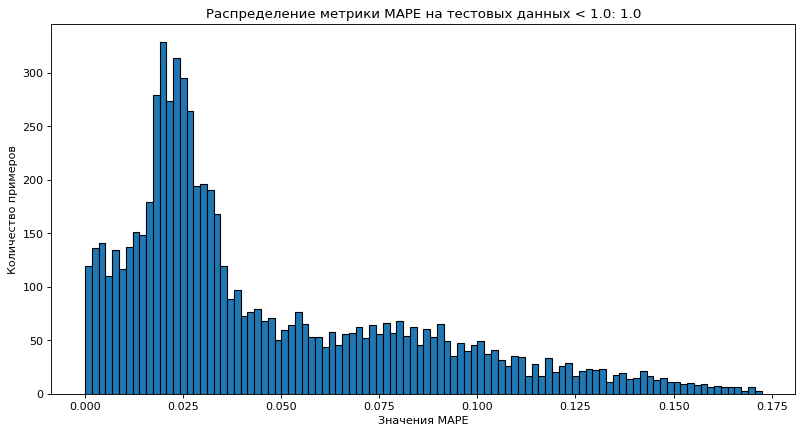

Процент значений MAPE < 1.0: 1.0


In [15]:
LV.histogram_mape(model,X_test,y_test,limit_percel = 100)

Количество записей: 5334


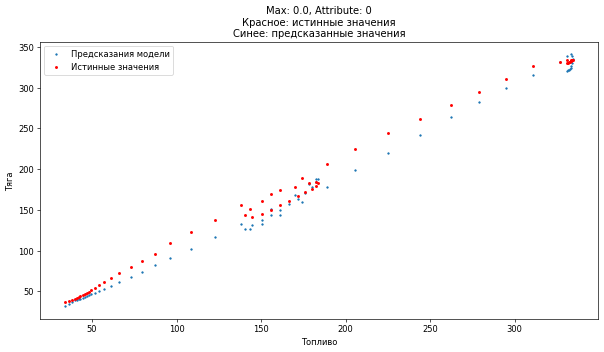

Количество записей: 5334


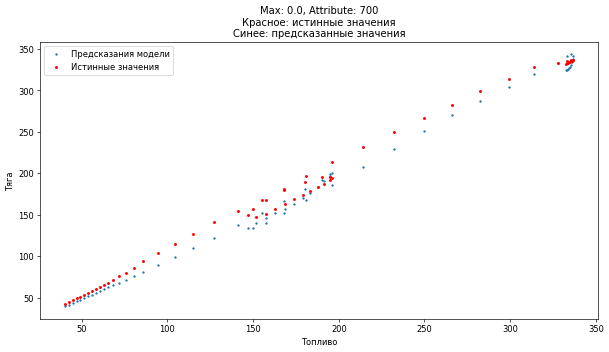

Количество записей: 5334


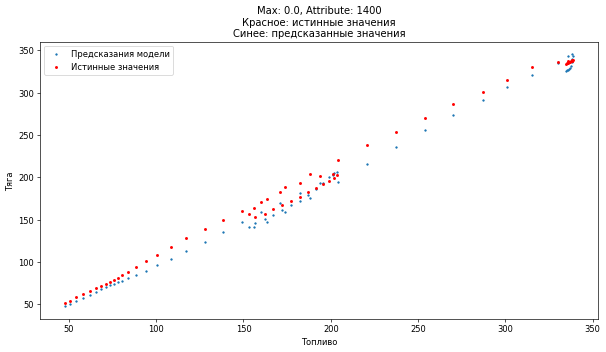

Количество записей: 5334


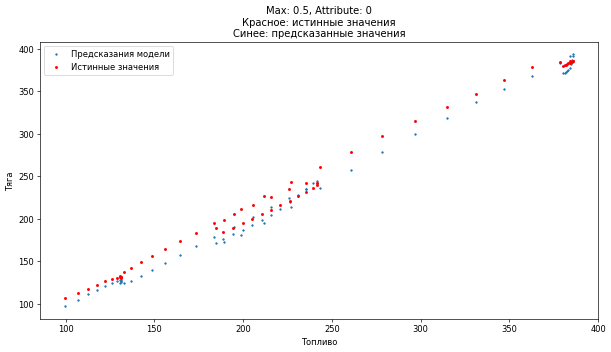

Количество записей: 5334


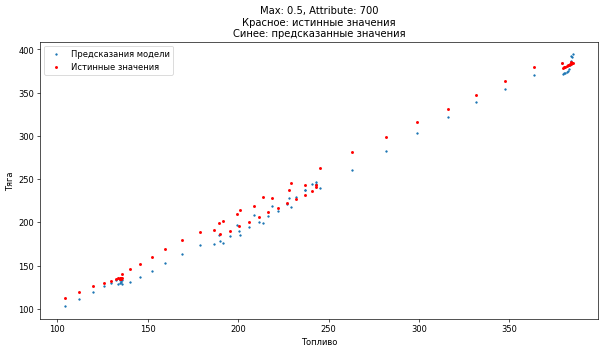

Количество записей: 5334


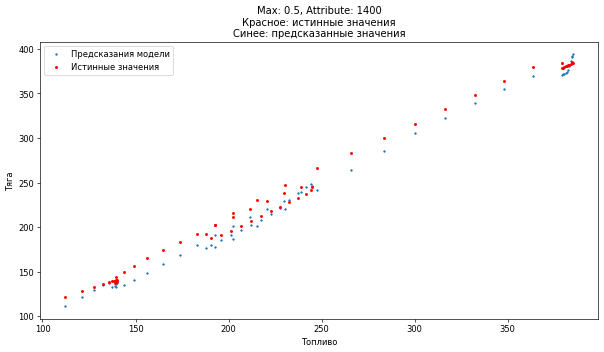

Количество записей: 5334


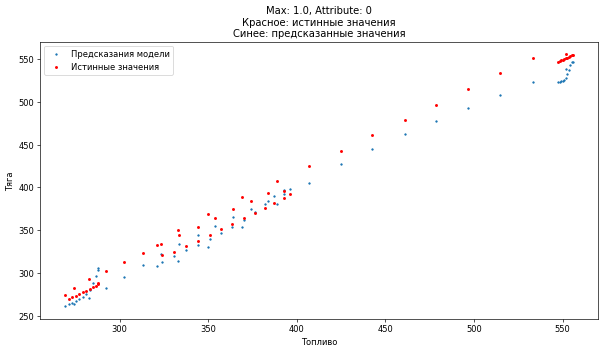

Количество записей: 5334


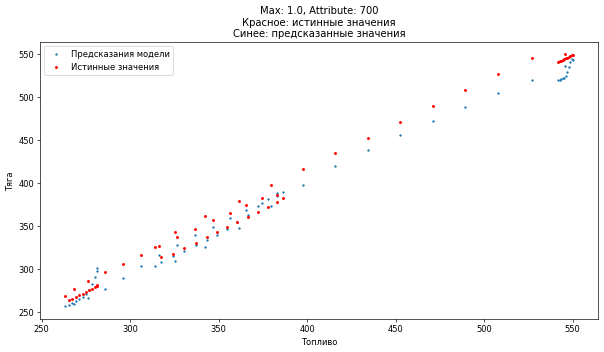

Количество записей: 5334


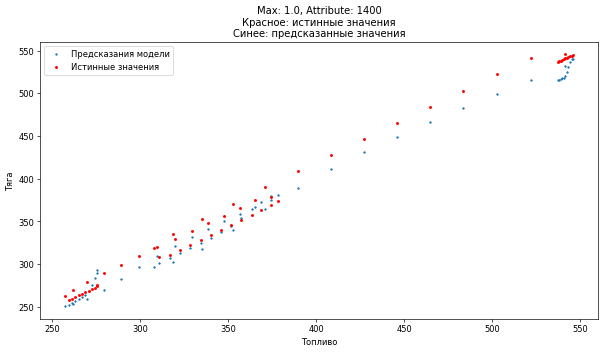

In [14]:
LV.show_predictions(model,df,pd_params,keras = False,device = device)